In [1]:
import numpy as np
import matplotlib.pyplot as plt

First, we'll simulate stock price using the given parameters.

In [2]:
def gen_stock_price(S_0, r, sigma, T, n = 1000):
  dt = T / n
  t = np.linspace(0, T, n+1, endpoint=True)
  S = np.zeros(n+1); S[0] = S_0
  for i in range(n):
    dS = (r * dt + sigma * np.random.normal(0, np.sqrt(dt))) * S[i]
    S[i+1] = S[i] + dS
  return (t, S)

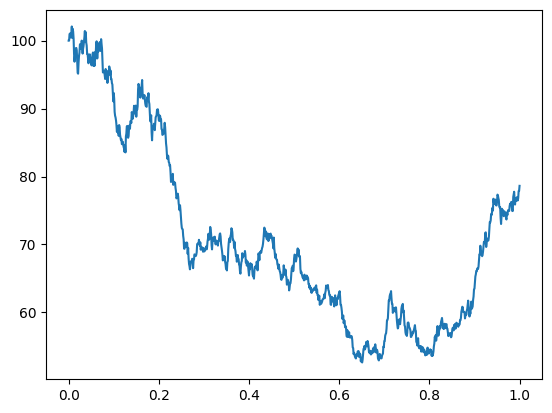

In [5]:
t, S = gen_stock_price(100, 0.06, 0.30, 1)
plt.plot(t, S)

European Call

In [6]:
def eur_call(S_0, K, r, sigma, T):
  nSim = 1000
  C = np.zeros(nSim)
  for i in range(nSim):
    _, S = gen_stock_price(S_0, r, sigma, T)
    C_T = np.max([S[-1] - K, 0])
    C[i] = np.exp(-r * T) * C_T
  return C

In [7]:
C = eur_call(100, 100, 0.06, 0.30, 1)

In [9]:
C.mean() # estimated call option price

15.108575331440711

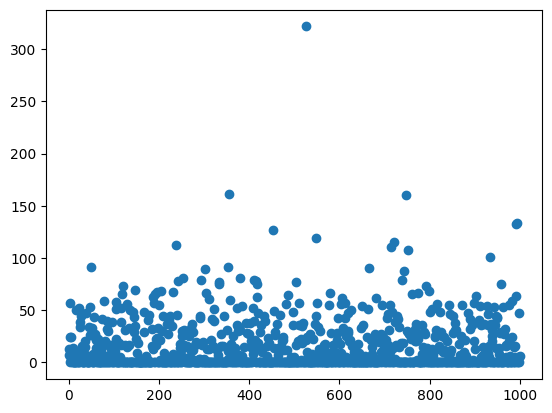

In [10]:
plt.scatter(range(1000), C)

**Antithetic Variance Reduction Technique**

In [11]:
def gen_stock_price_antithetic(S_0, r, sigma, T, n = 1000):
  dt = T/n
  t = np.linspace(0, T, n+1, endpoint = True)
  S1 = np.zeros(n+1); S1[0] = S_0
  S2 = np.zeros(n+1); S2[0] = S_0
  for i in range(n):
    dW = np.random.normal(0, np.sqrt(dt))
    dS1 = (r * dt + sigma * dW) * S1[i]
    dS2 = (r * dt - sigma * dW) * S2[i]
    S1[i+1] = S1[i] + dS1
    S2[i+1] = S2[i] + dS2
  return (t, S1, S2)

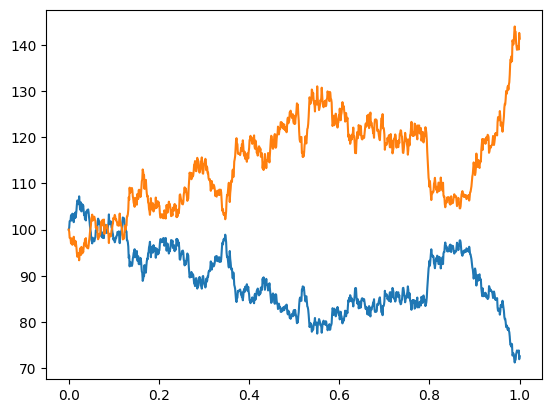

In [15]:
t, S1, S2 = gen_stock_price_antithetic(100, 0.06, 0.30, 1)
plt.plot(t, S1)
plt.plot(t, S2)

In [16]:
def eur_call_antithetic(S_0, K, r, sigma, T):
  nSim = 1000
  C = np.zeros(nSim)
  for i in range(nSim):
    _, S1, S2 = gen_stock_price_antithetic(S_0, r, sigma, T)
    C_T = (np.max([S1[-1] - K, 0]) + np.max([S2[-1] - K, 0])) / 2
    C[i] = np.exp(-r * T) * C_T
    return C

In [18]:
C_antithetic = eur_call(100, 100, 0.06, 0.30, 1)

In [19]:
C_antithetic.mean()

13.044911349462717

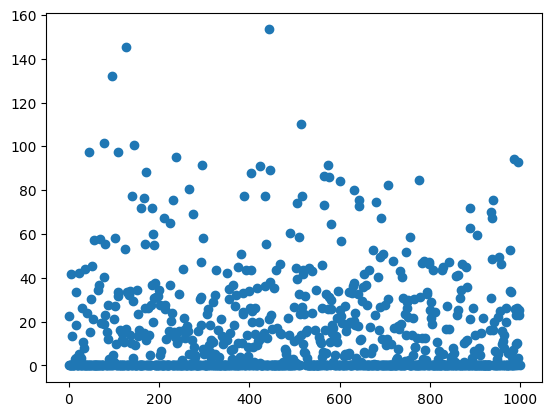

In [21]:
plt.scatter(range(1000), C_antithetic)

**Asian Options**
Instead of ending stock price, we use average stock price to compute payoff, where the average is taken over one stock price per day until expiration.

In [22]:
def asian_call(S_0, K, r, sigma, T):
  nSim = 1000
  C = np.zeros(nSim)
  for i in range(nSim):
    _, S = gen_stock_price(S_0, r, sigma, T, n = int(250*T))
    C_T = np.max([S.mean() - K, 0])
    C[i] = np.exp(-r * T) * C_T
  return C.mean()

In [23]:
asian_call(100, 100, 0.06, 0.30, 1)

8.463481300686329

**Lookback Option**

In [26]:
def lookback_call(S_0, K, r, sigma, T):
  nSim = 1000
  C = np.zeros(nSim)
  for i in range(nSim):
    _, S = gen_stock_price(S_0, r, sigma, T)
    C_T = np.max([S.max() - K, 0])
    C[i] = np.exp(-r * T) * C_T
  return C.mean()

In [27]:
lookback_call(100, 100, 0.06, 0.30, 1)

27.134961784797806

**BARRIER OPTIONS**

False


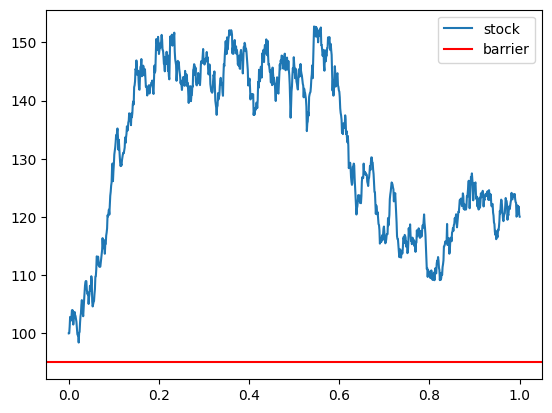

In [34]:
# check how barrier works
t, S = gen_stock_price(100, 0.06, 0.30, 1)
# Barrier = 95
print(np.any(S < 95))
plt.plot(t, S, label = 'stock')
plt.axhline(y = 95, label = 'barrier', color = 'red')
plt.legend()

In [54]:
def down_out_call(S_0, K, B, r, sigma, T):
  nSim = 1000
  C = np.zeros(nSim)
  for i in range(nSim):
    t, S = gen_stock_price(S_0, r, sigma, T)
    # check if any stock price is less than barrier
    barrier_cross = np.any(S < B)
    if not barrier_cross:
      dt = t[1] - t[0]
      barrier_cross_prob = np.exp(-2*(S[1:]-B)*(S[:-1]-B) / (sigma**2 * dt))
      U = np.random.uniform(0, 1, size = len(barrier_cross_prob))
      barrier_cross = np.any(U < barrier_cross_prob)
    if not barrier_cross:
      C_T = np.max([S[-1] - K, 0])
      C[i] = np.exp(-r * T) * C_T
  # return (t, S, C)
  return C.mean()

[0.]


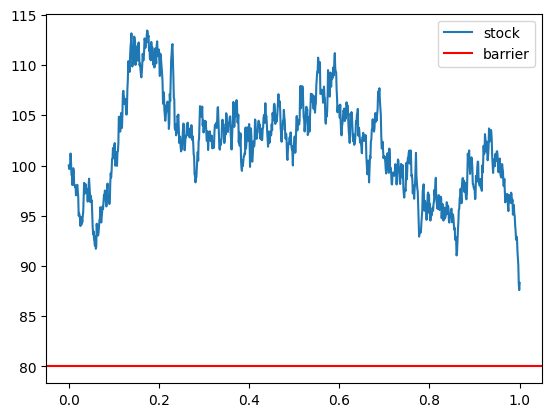

In [53]:
t, S, C = down_out_call(100, 100, 80, 0.06, 0.30, 1)
print(C)
plt.plot(t, S, label = 'stock')
plt.axhline(y = 80, label = 'barrier', color = 'red')
plt.legend()

In [55]:
down_out_call(100, 100, 95, 0.06, 0.30, 1)

6.693377571243426